In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,mean_absolute_percentage_error

In [15]:
house_data = pd.read_csv('California_Houses.csv')
house_data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [16]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [17]:
house_data.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

No nulls in dataset

In [18]:
house_data.duplicated().sum()

0

No duplicates

Visualization

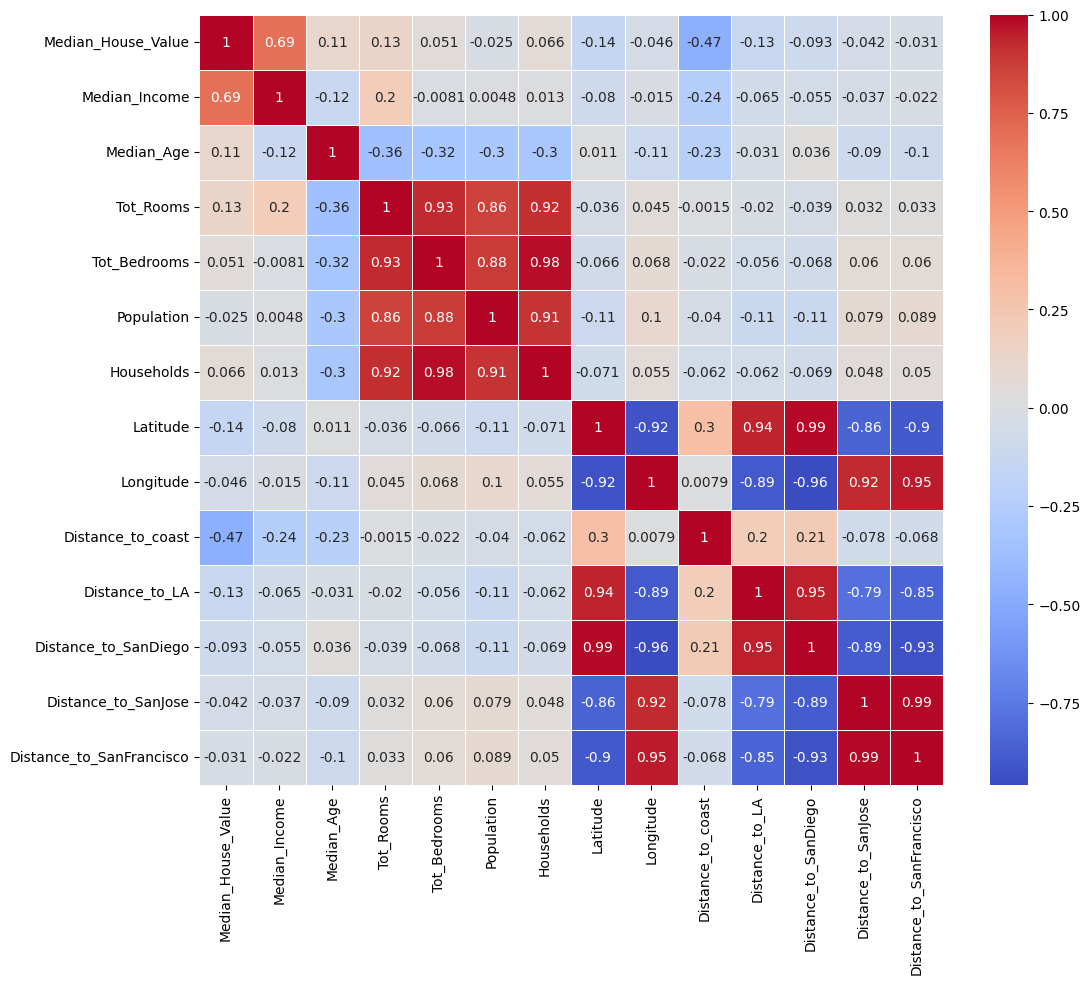

In [19]:
correlation_matrix = house_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

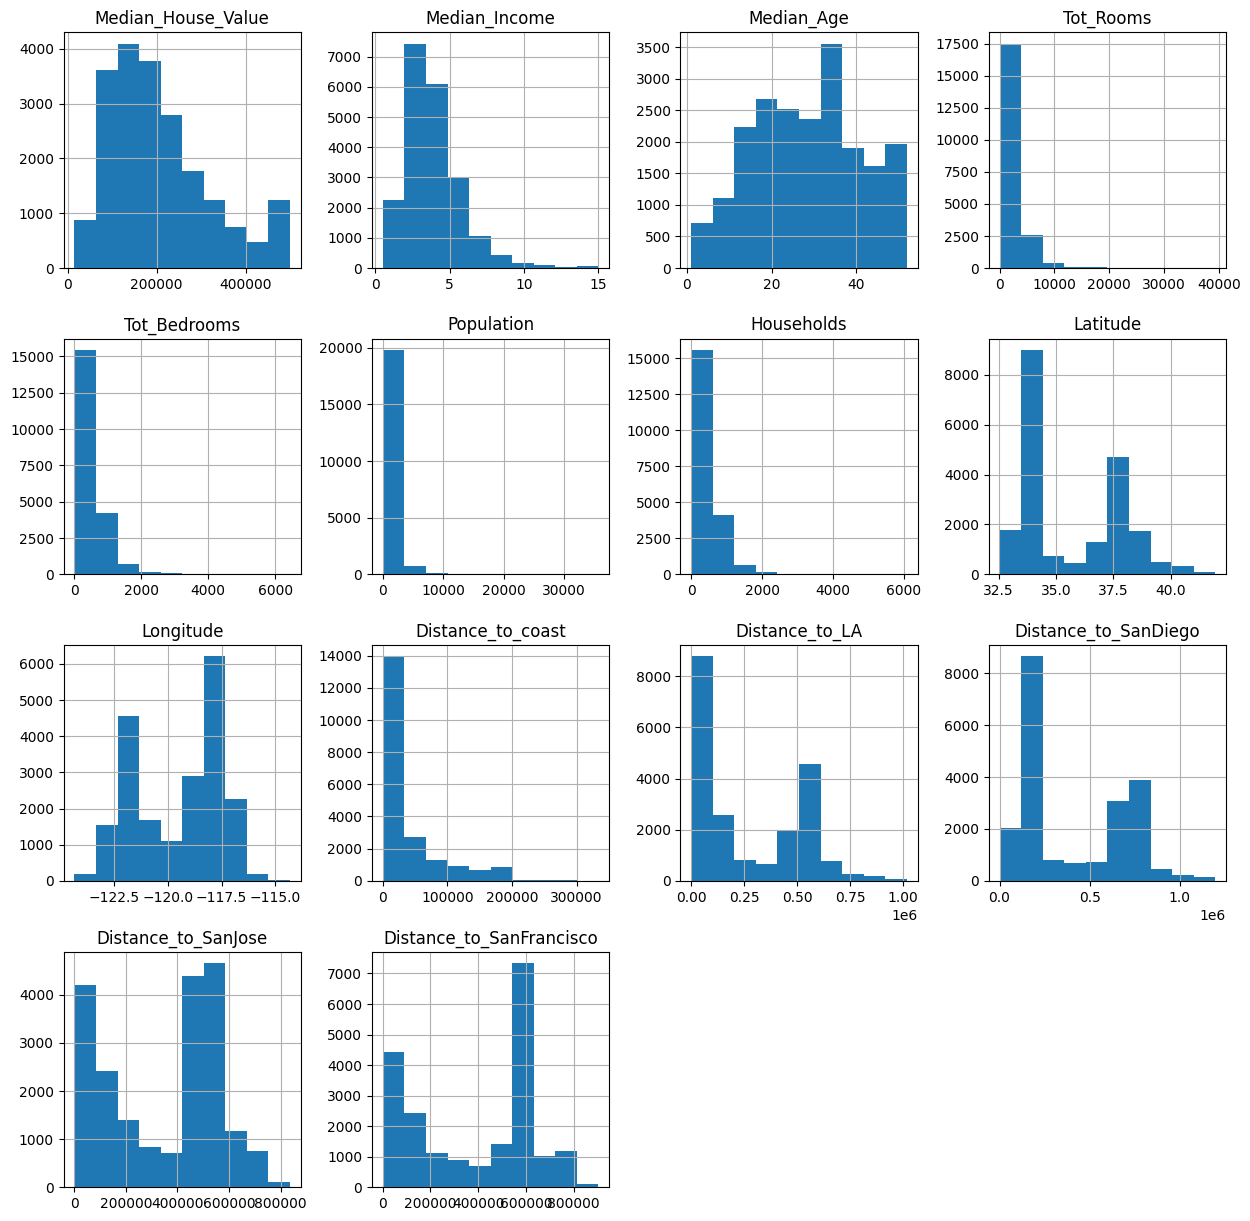

In [20]:
house_data.hist(figsize=(15, 15))

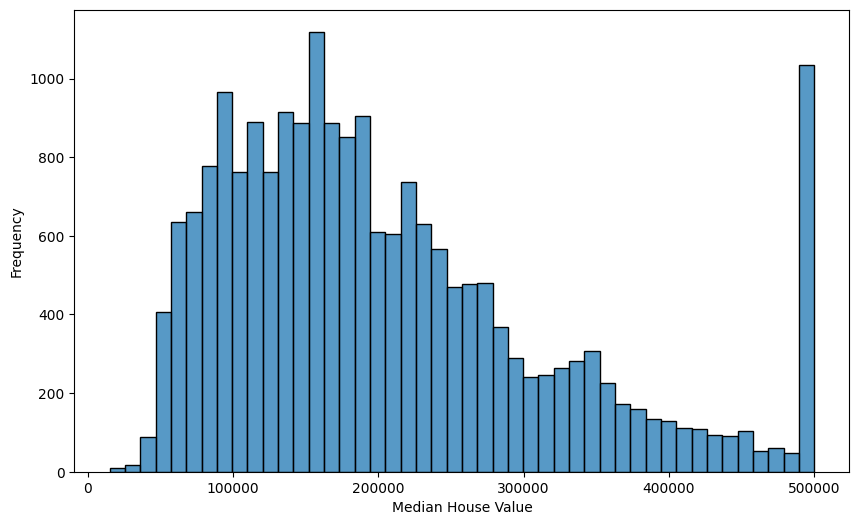

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(house_data['Median_House_Value'])
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

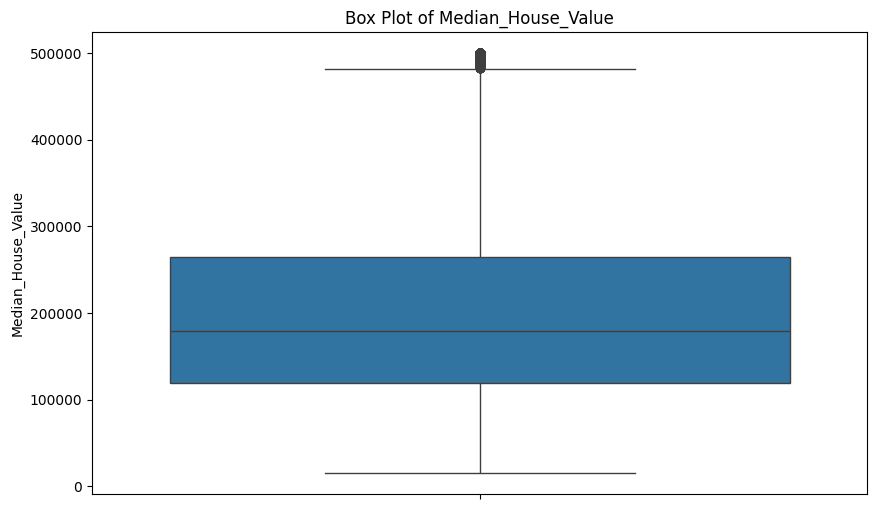

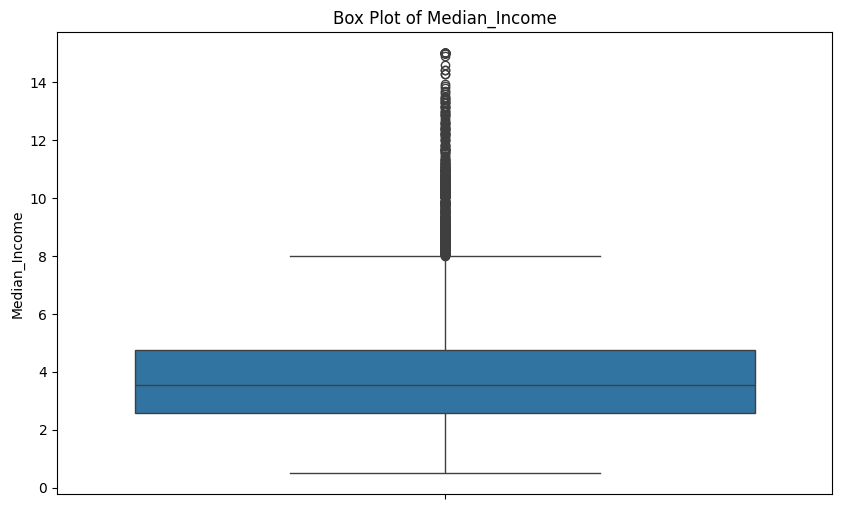

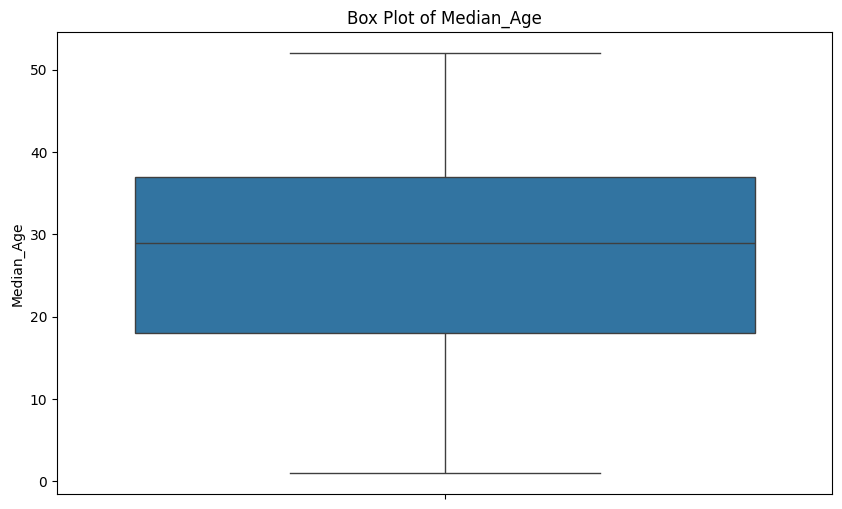

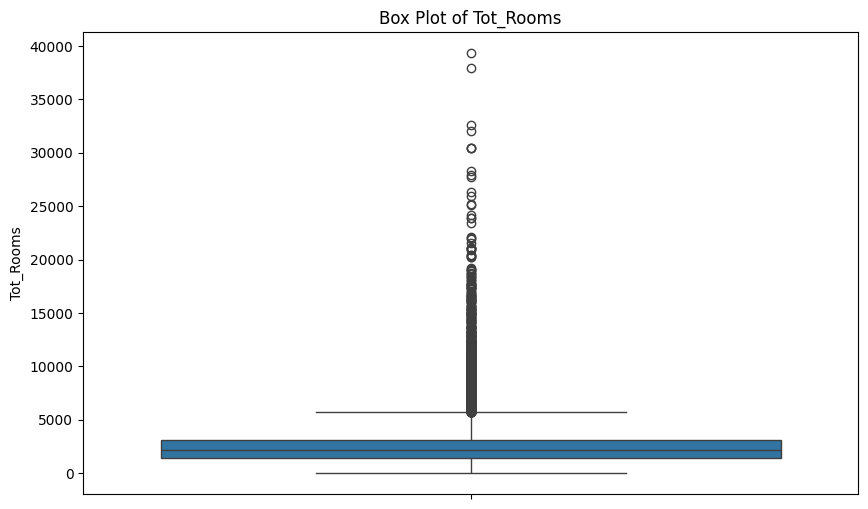

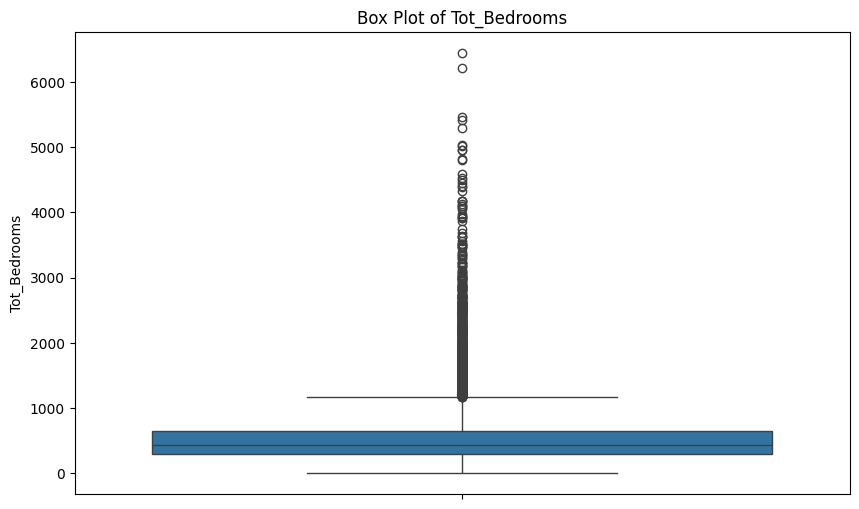

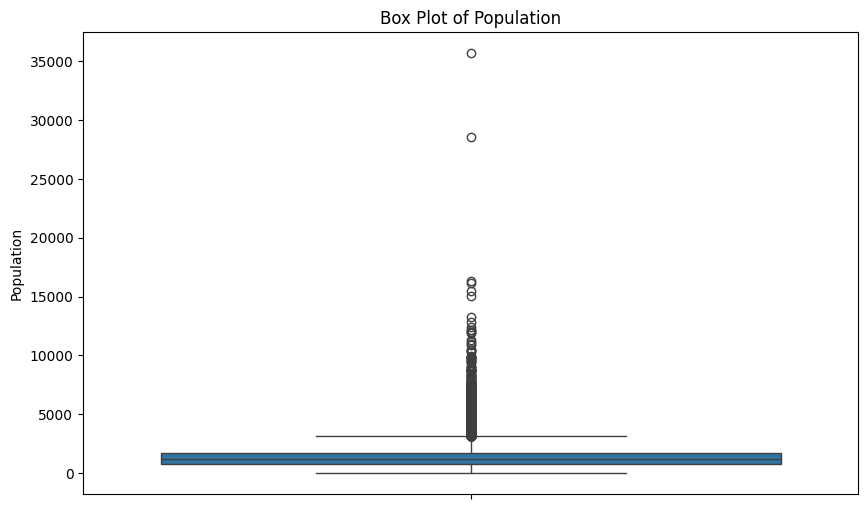

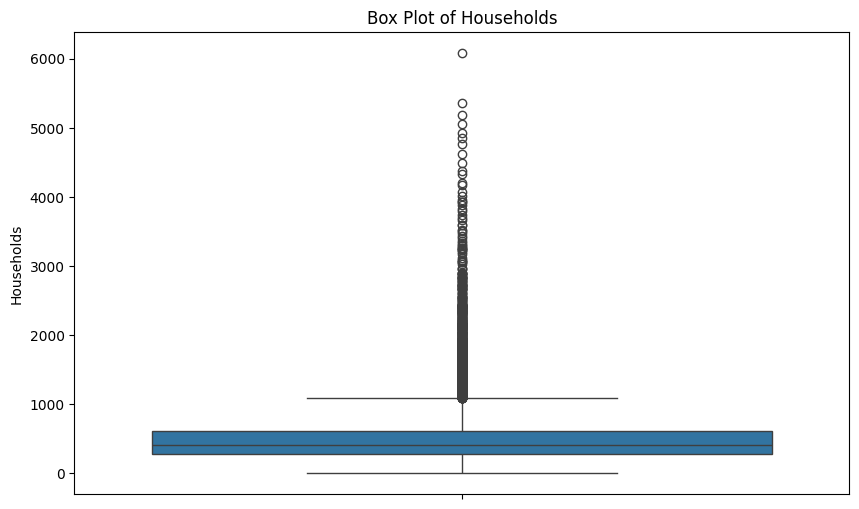

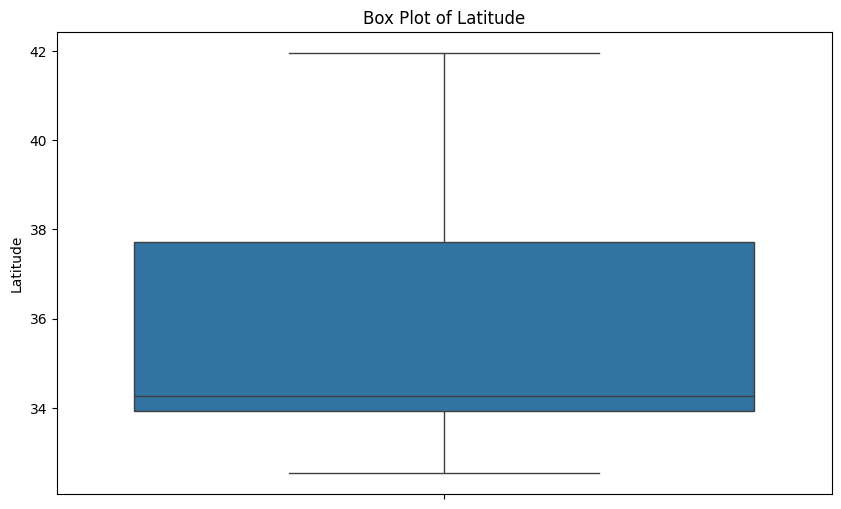

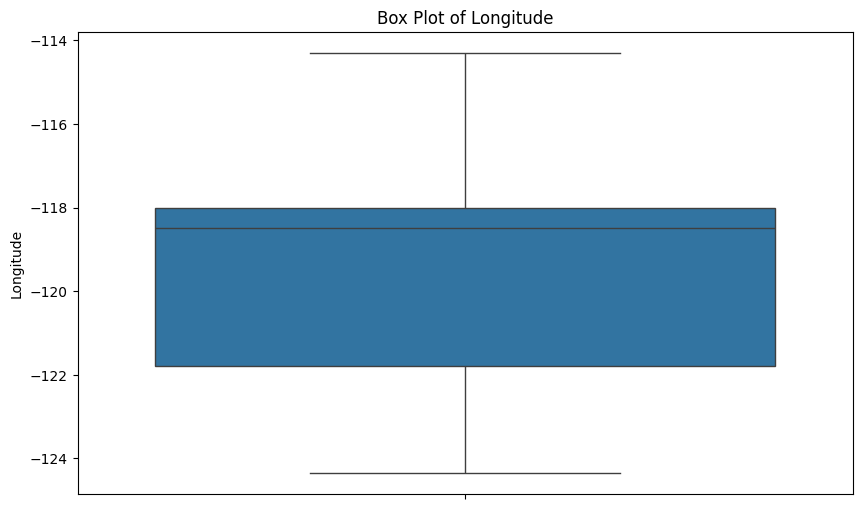

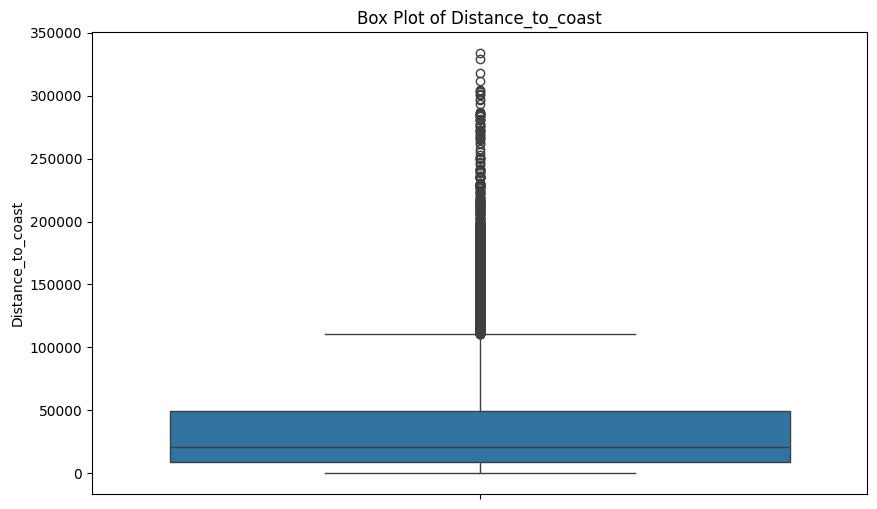

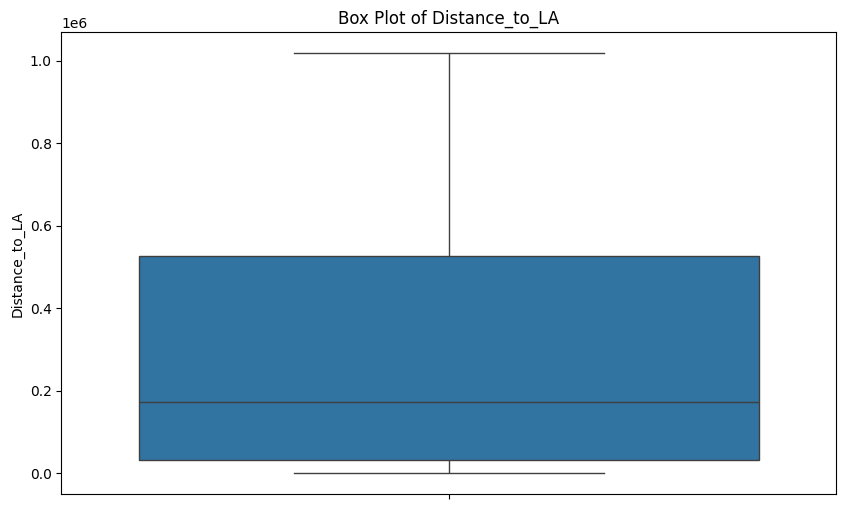

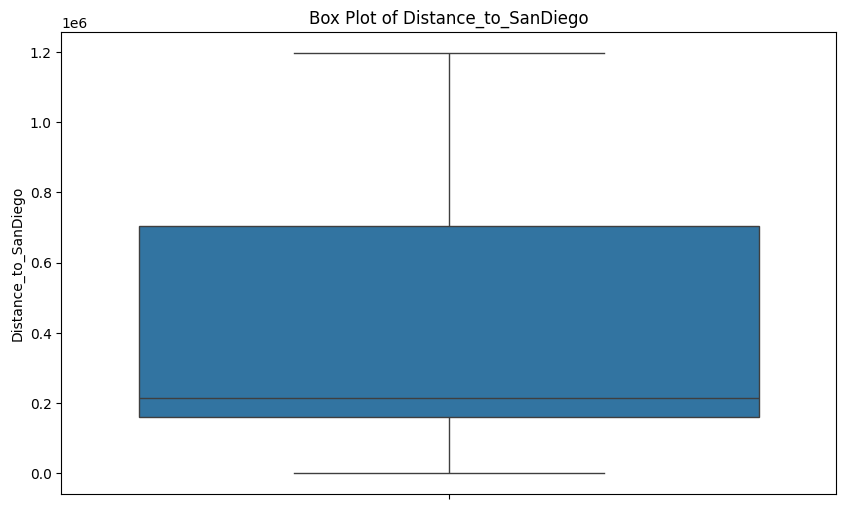

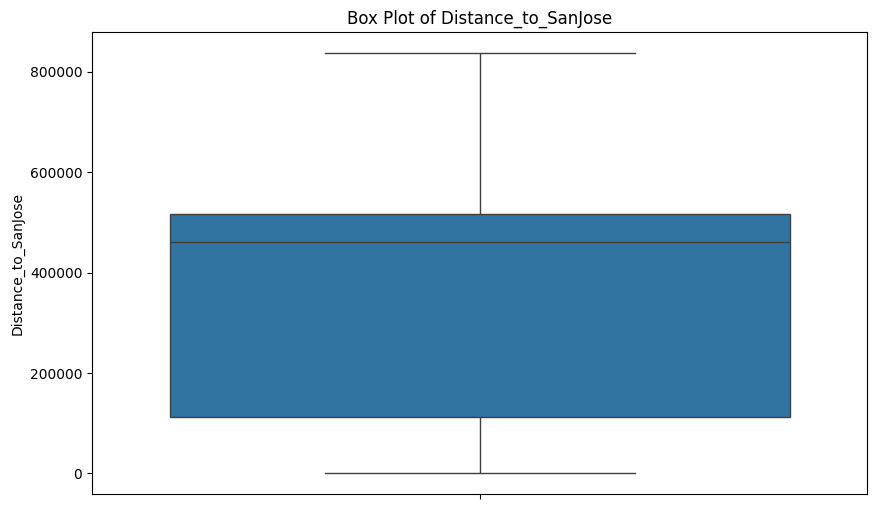

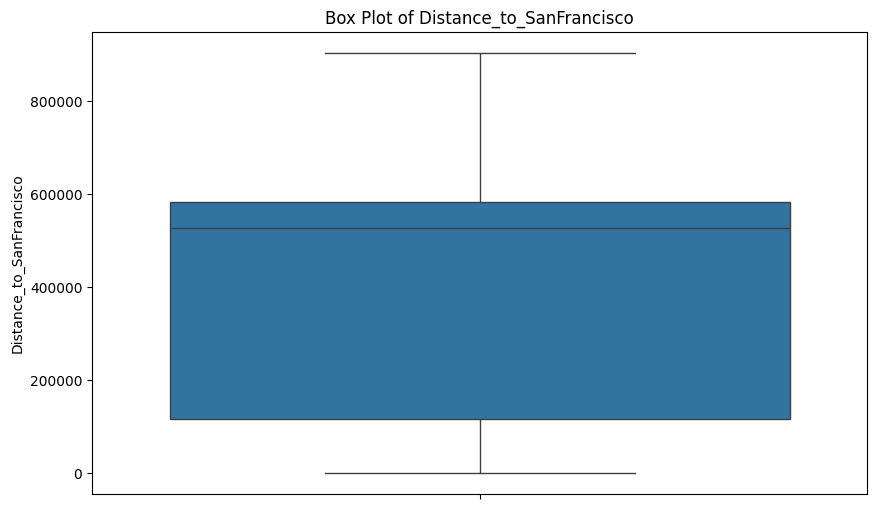

In [22]:
for column in house_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=house_data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()


Reduce the outliers to perform a better model

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [24]:
outlier_counts_list = []

for column in house_data.columns:
    count = remove_outliers(house_data, column).shape[0]
    outlier_counts_list.append({'Feature': column, 'Outlier Count': count})

outlier_counts = pd.DataFrame(outlier_counts_list)

outlier_counts

,Feature,Outlier Count
0,Median_House_Value,19569
1,Median_Income,19959
2,Median_Age,20640
3,Tot_Rooms,19353
4,Tot_Bedrooms,19358
5,Population,19444
6,Households,19420
7,Latitude,20640
8,Longitude,20640
9,Distance_to_coast,18264


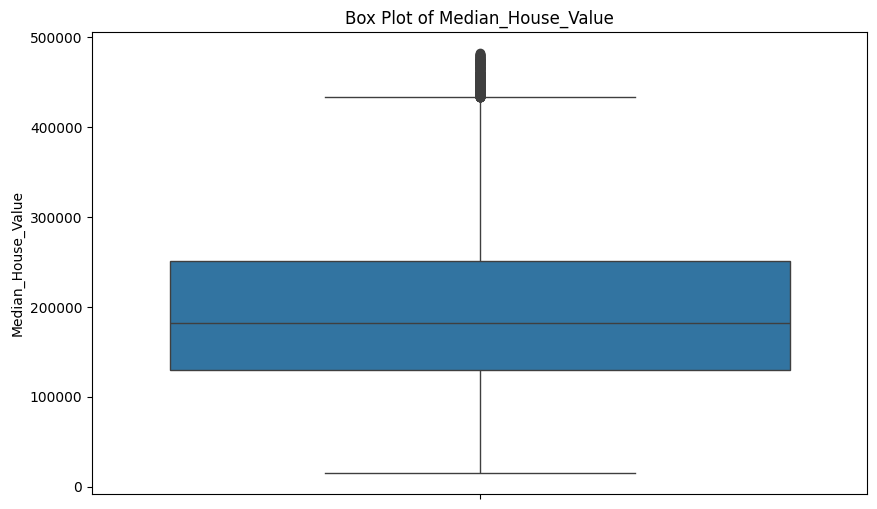

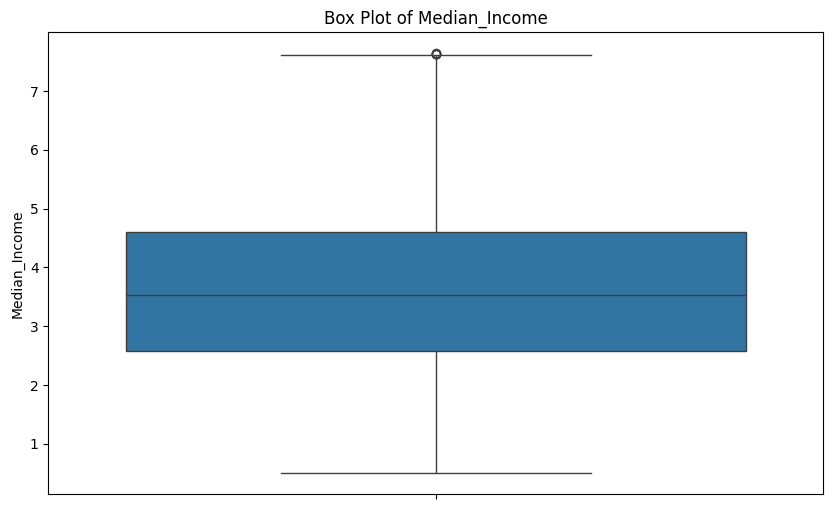

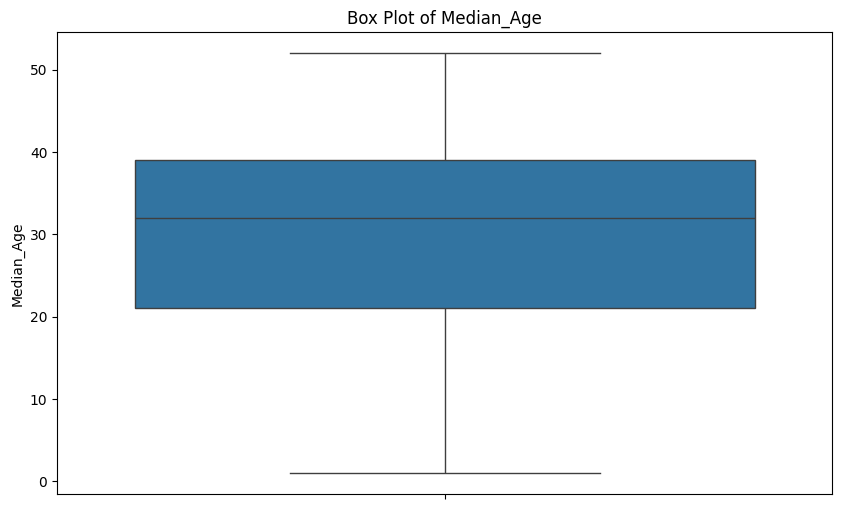

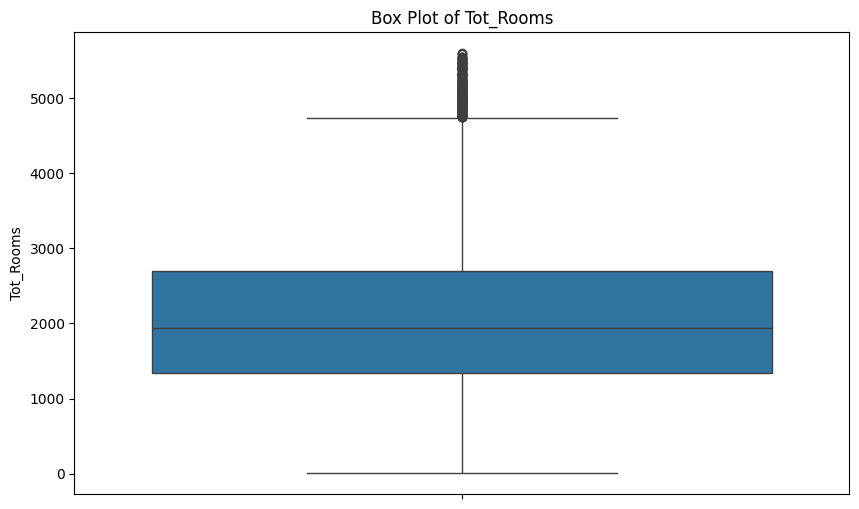

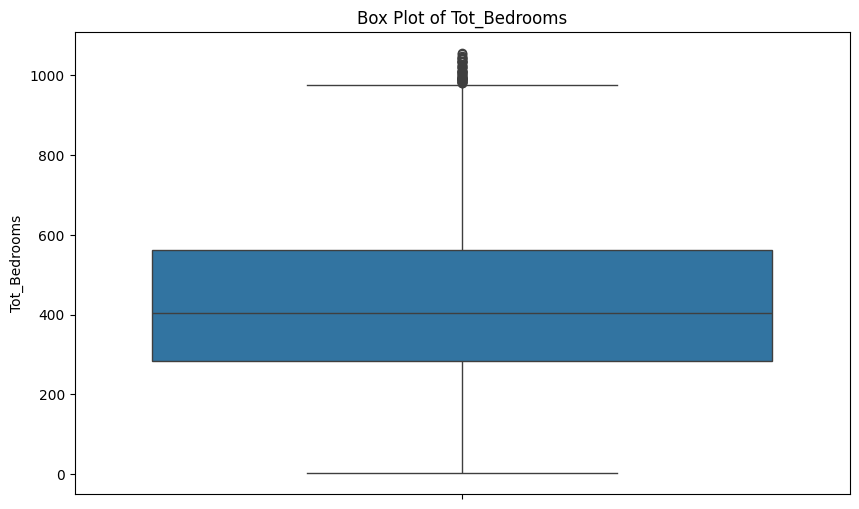

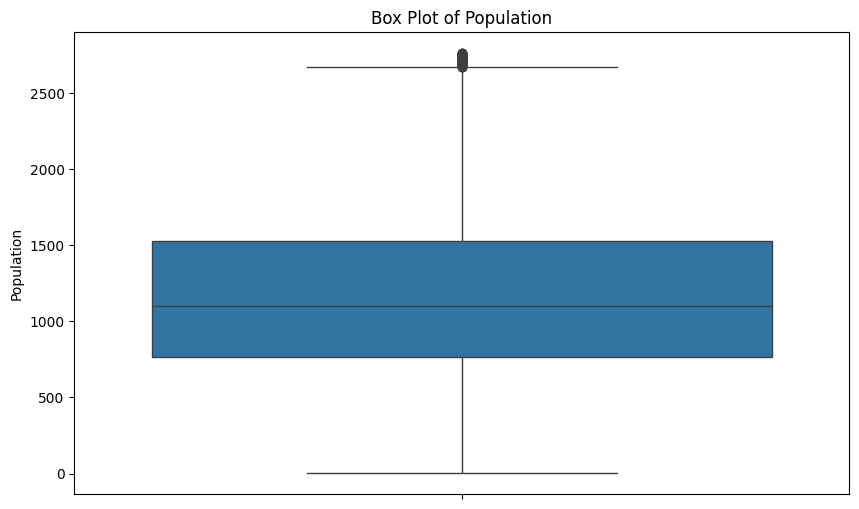

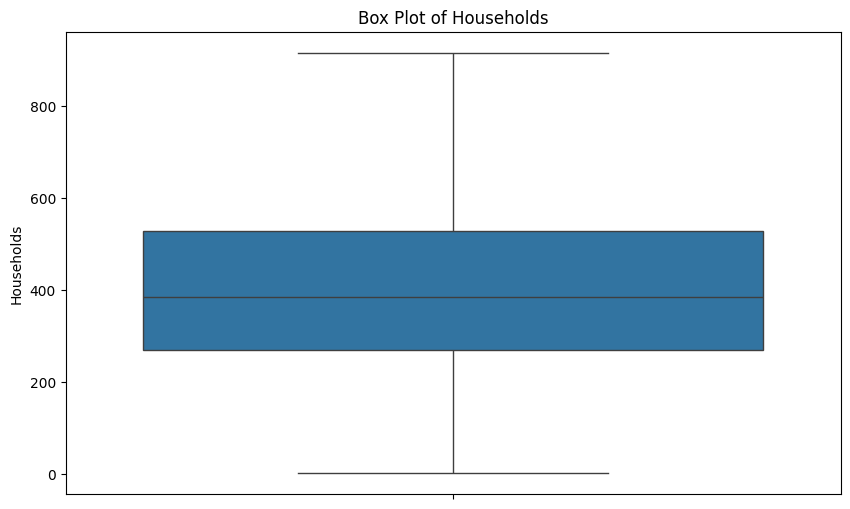

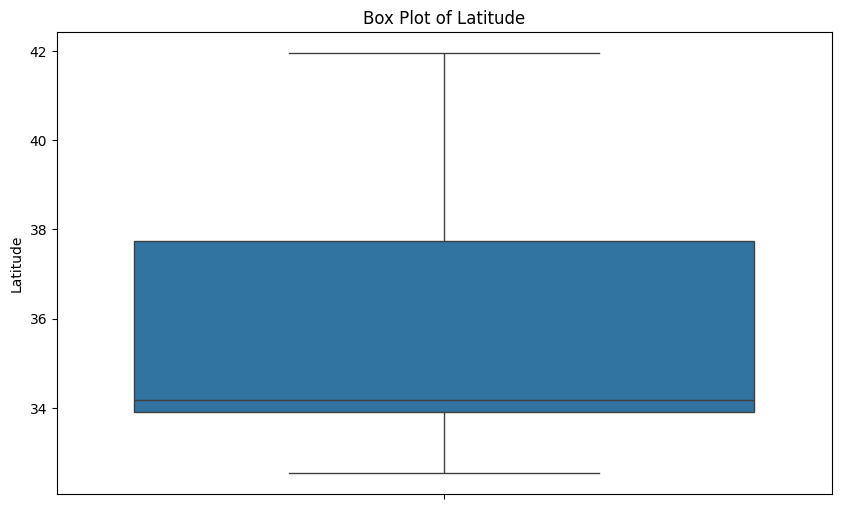

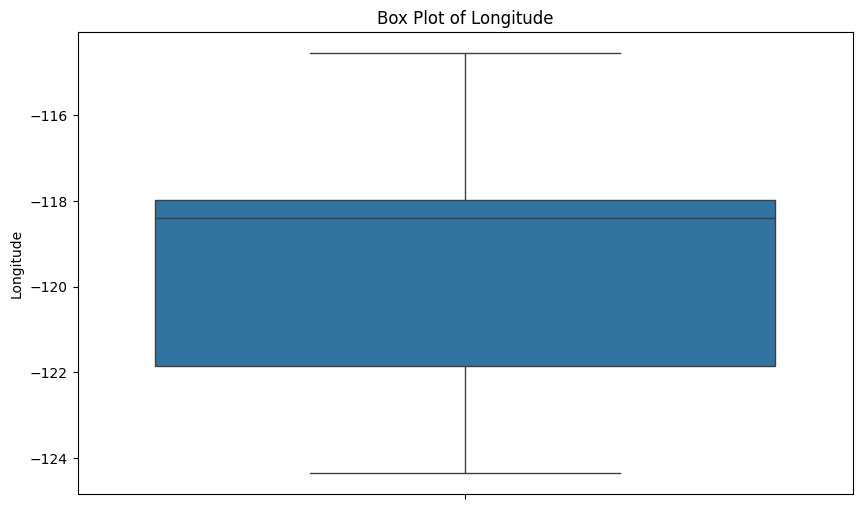

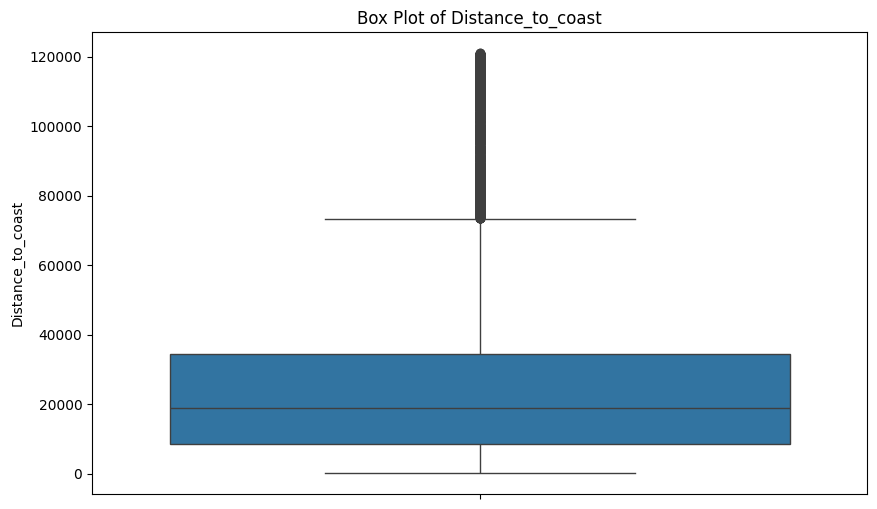

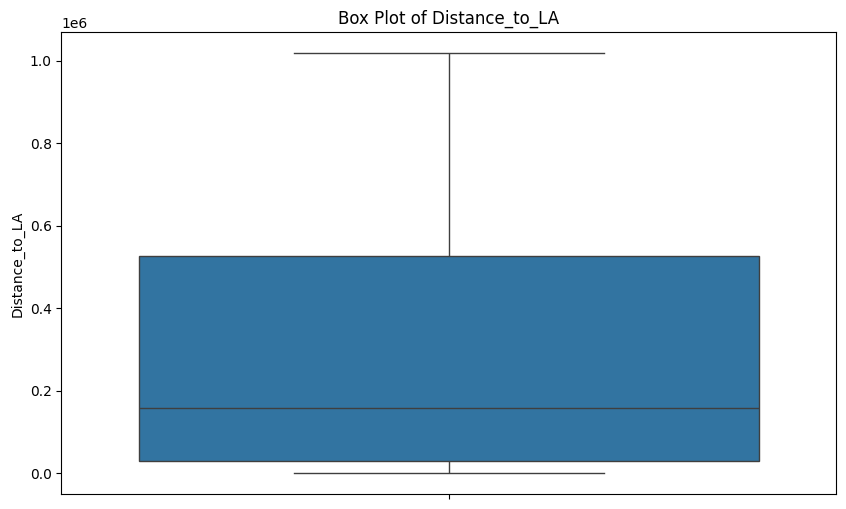

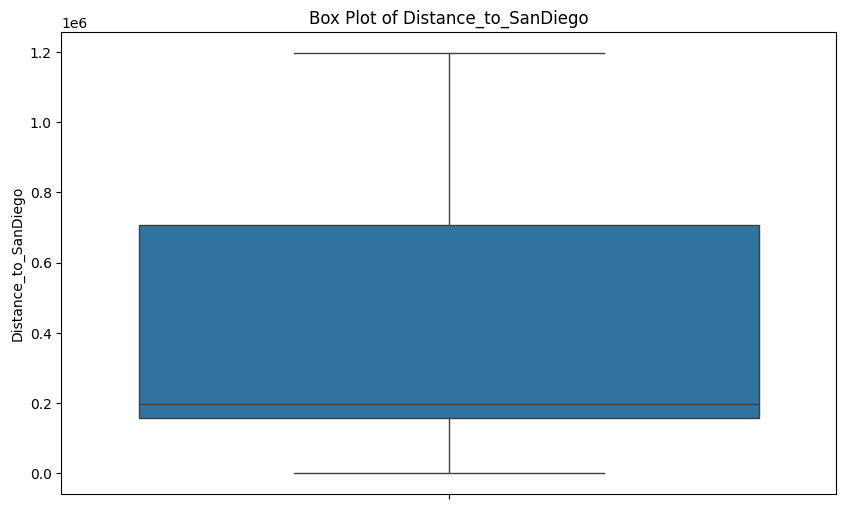

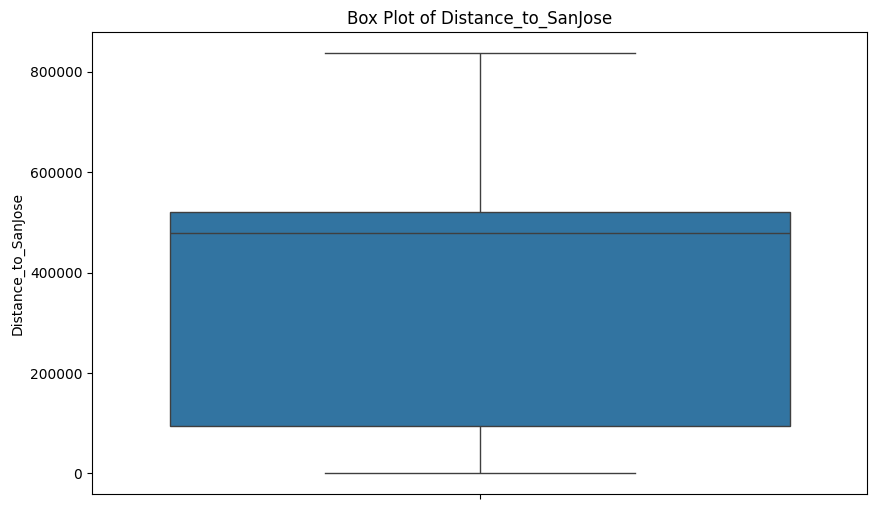

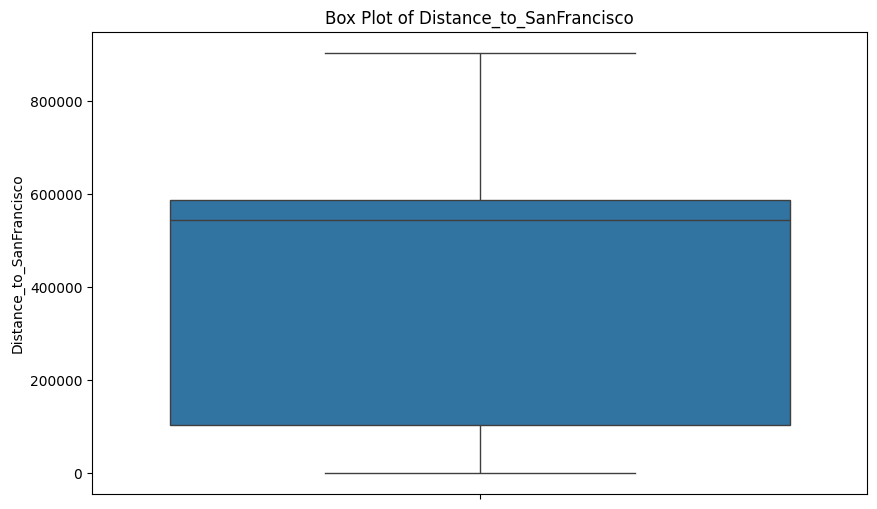

In [25]:
columns_to_clean = ['Median_House_Value', 'Median_Income', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Distance_to_coast']

for column in columns_to_clean:
    house_data = remove_outliers(house_data, column)

for column in house_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=house_data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

In [26]:
outlier_counts_list = []

for column in house_data.columns:
    count = remove_outliers(house_data, column).shape[0]
    outlier_counts_list.append({'Feature': column, 'Outlier Count': count})

outlier_counts = pd.DataFrame(outlier_counts_list)

outlier_counts

,Feature,Outlier Count
0,Median_House_Value,14841
1,Median_Income,15081
2,Median_Age,15086
3,Tot_Rooms,14874
4,Tot_Bedrooms,15031
5,Population,15017
6,Households,15086
7,Latitude,15086
8,Longitude,15086
9,Distance_to_coast,13781


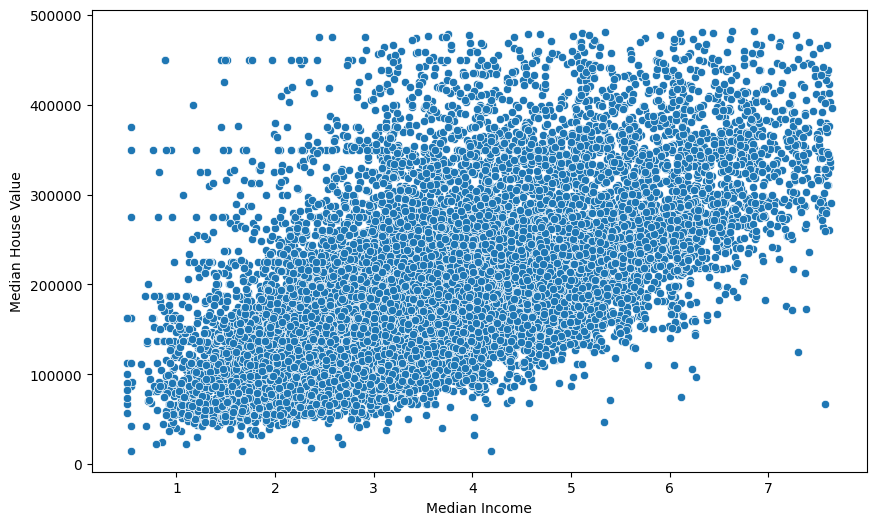

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data, x='Median_Income', y='Median_House_Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

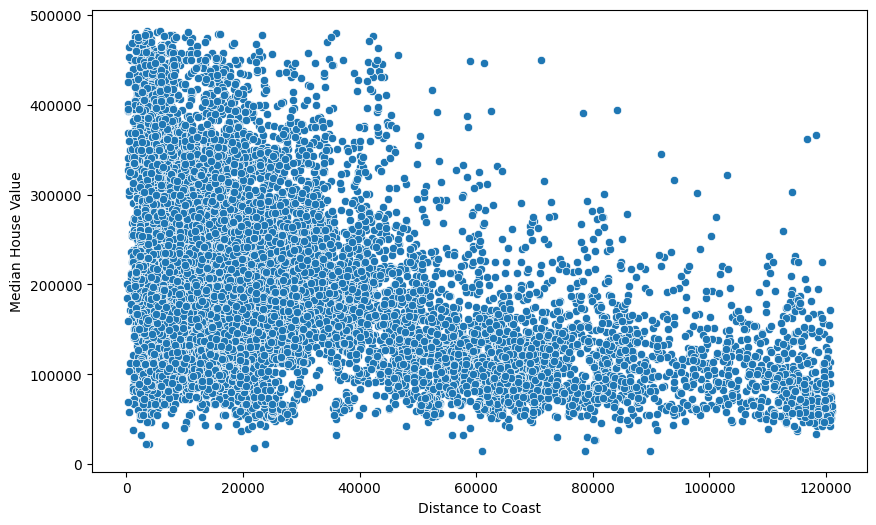

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_data, x='Distance_to_coast', y='Median_House_Value')
plt.xlabel('Distance to Coast')
plt.ylabel('Median House Value')
plt.show()

In [29]:
X = house_data.drop('Median_House_Value', axis=1)
y = house_data['Median_House_Value']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=72)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=72)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [31]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [32]:
y_pred_lr = lr.predict(X_test_scaled)

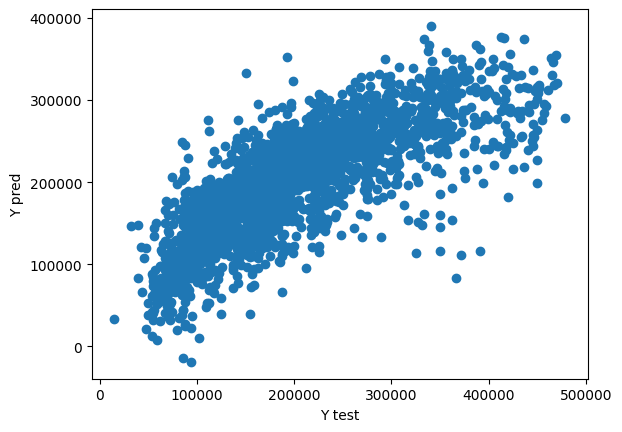

In [33]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

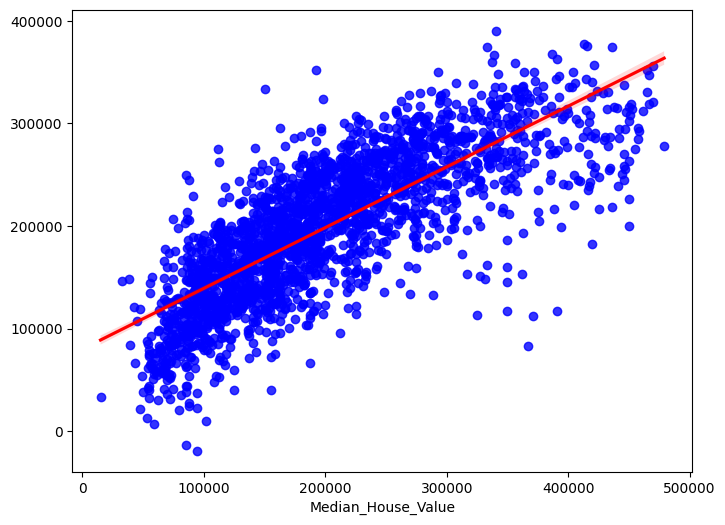

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [50]:
lasso = Lasso(alpha=0.4)  
lasso.fit(X_train_scaled, y_train)

C:\Users\Kimo Store\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+13, tolerance: 8.674e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.4)

In [51]:
y_pred_lasso = lasso.predict(X_test_scaled)

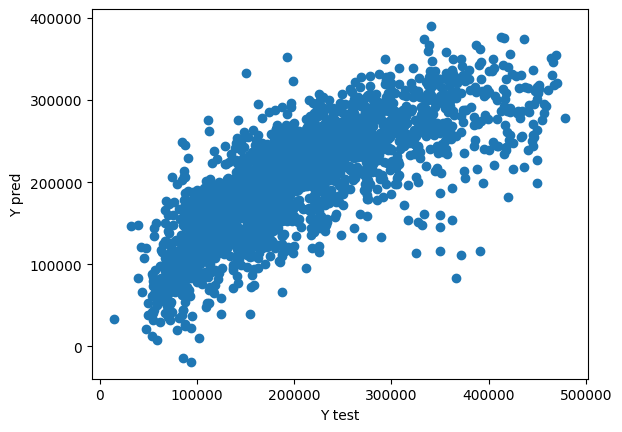

In [52]:
plt.scatter(y_test,y_pred_lasso)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

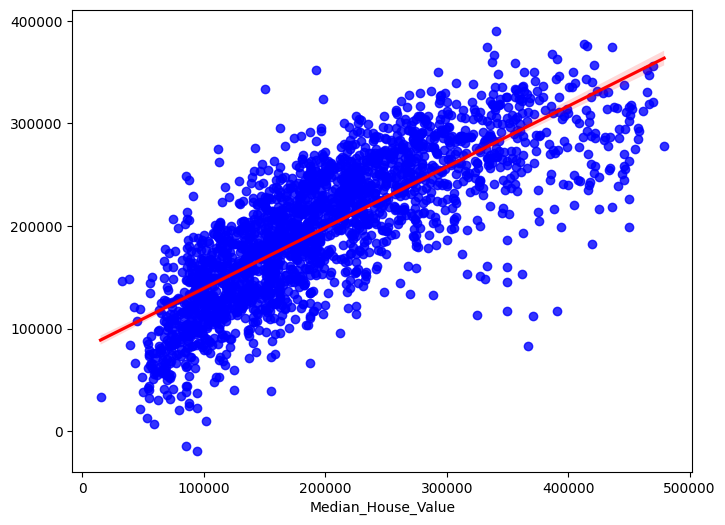

In [53]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lasso, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [54]:
ridge = Ridge(alpha=0.4)  
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.4)

In [55]:
y_pred_ridge = ridge.predict(X_test_scaled)

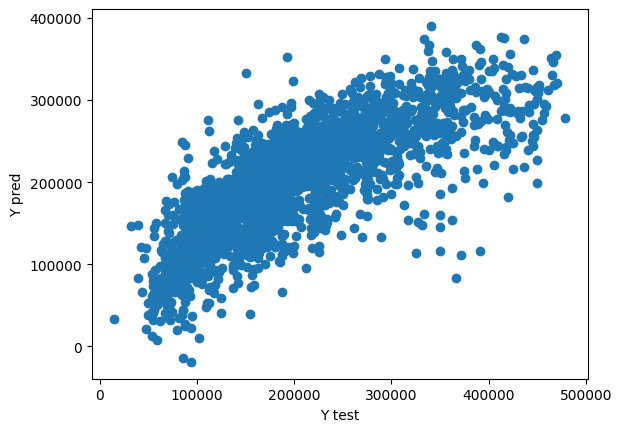

In [56]:
plt.scatter(y_test,y_pred_ridge)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

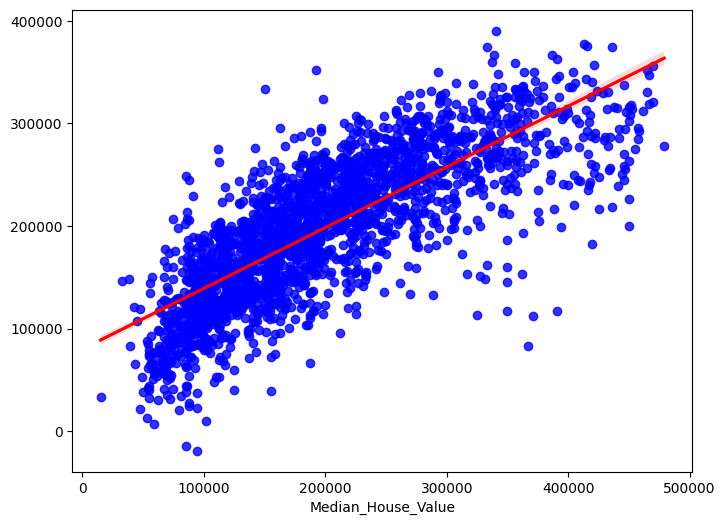

In [57]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_ridge, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [58]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)

In [59]:
print('Mean Squared Error LR: ',mse_lr)
print('Mean Squared Error Lasso: ',mse_lasso)
print('Mean Squared Error Ridge: ',mse_ridge)
print('Mean absolute error LR: ', mae_lr)
print('Mean absolute error Lasso: ', mae_lasso)
print('Mean absolute error Ridge: ', mae_ridge)

Mean Squared Error LR:  3307228849.0476165
Mean Squared Error Lasso:  3307224286.6204267
Mean Squared Error Ridge:  3307279847.2781982
Mean absolute error LR:  42688.20200800906
Mean absolute error Lasso:  42689.38903502964
Mean absolute error Ridge:  42691.12100005777


In [60]:
r2_lr = r2_score(y_test,y_pred_lr)
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_ridge = r2_score(y_test,y_pred_ridge)
print('R2 score LR: ',r2_lr)
print('R2 score Lasso: ',r2_lasso)
print('R2 score Ridge: ',r2_ridge)


R2 score LR:  0.6111302760884514
R2 score Lasso:  0.6111308125465807
R2 score Ridge:  0.6111242796277432


In [61]:
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mspe_lr = np.mean(((y_test - y_pred_lr) / y_test) ** 2) * 100
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
mspe_lasso = np.mean(((y_test - y_pred_lasso) / y_test) ** 2) * 100
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
mspe_ridge = np.mean(((y_test - y_pred_ridge) / y_test) ** 2) * 100

In [62]:
print(f'MSPE_lr: {mspe_lr:.2f}%')
print(f'MAPE_lr: {mape_lr * 100:.2f}%')
print(f'MSPE_lasso: {mspe_lasso:.2f}%')
print(f'MAPE_lasso: {mape_lasso * 100:.2f}%')
print(f'MSPE_ridge: {mspe_ridge:.2f}%')
print(f'MAPE_ridge: {mape_ridge * 100:.2f}%')

MSPE_lr: 12.38%
MAPE_lr: 24.52%
MSPE_lasso: 12.37%
MAPE_lasso: 24.52%
MSPE_ridge: 12.37%
MAPE_ridge: 24.52%


we can say that Models used have approximatly the same mean absolute error and mean squared error

In [84]:
exclude_columns = [ 'Tot_Bedrooms', 'Population', 'Households']
X = house_data.drop(columns=exclude_columns + ['Median_House_Value'])
y = house_data['Median_House_Value']

In [85]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=72)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=72)

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [87]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [88]:
y_pred_lr = lr.predict(X_test_scaled)

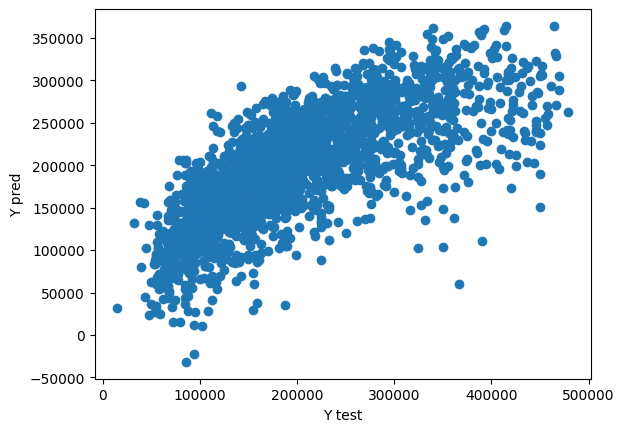

In [89]:
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

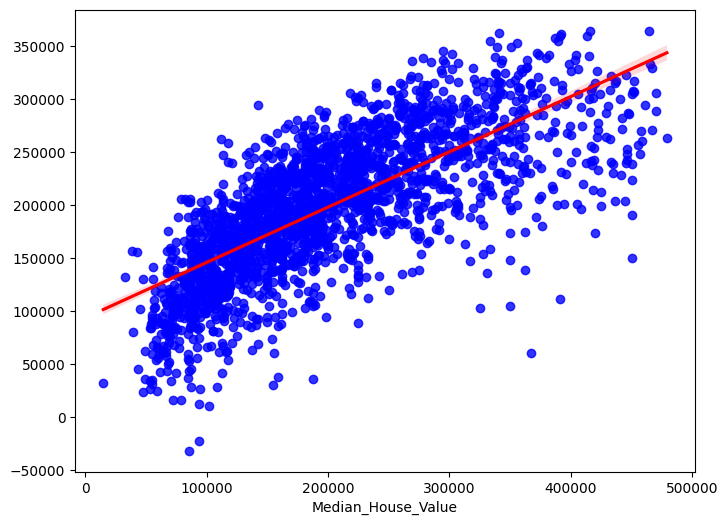

In [90]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [91]:
lasso = Lasso(alpha=0.4)  
lasso.fit(X_train_scaled, y_train)

C:\Users\Kimo Store\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+13, tolerance: 8.674e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.4)

In [92]:
y_pred_lasso = lasso.predict(X_test_scaled)

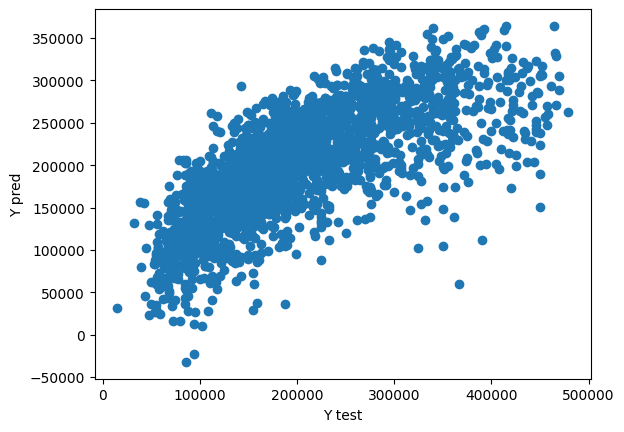

In [93]:
plt.scatter(y_test,y_pred_lasso)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

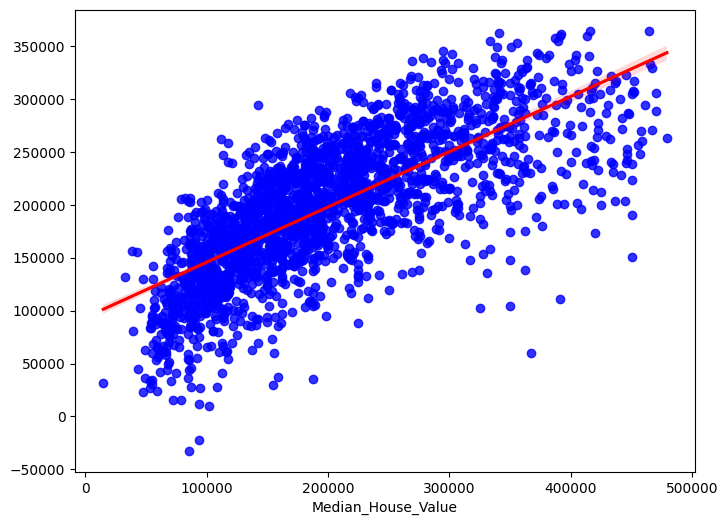

In [94]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lasso, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [95]:
ridge = Ridge(alpha=0.4)  
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.4)

In [96]:
y_pred_ridge = ridge.predict(X_test_scaled)

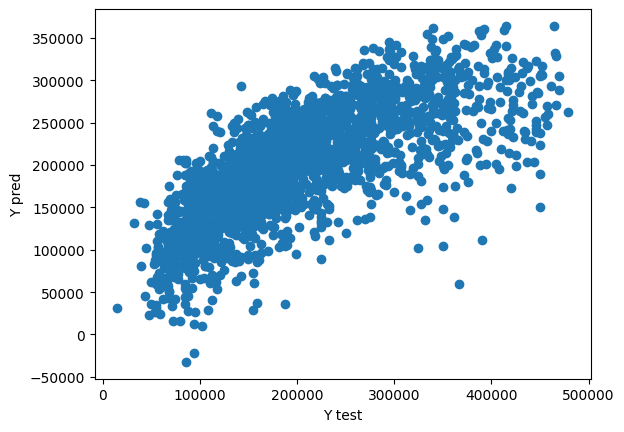

In [97]:
plt.scatter(y_test,y_pred_ridge)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

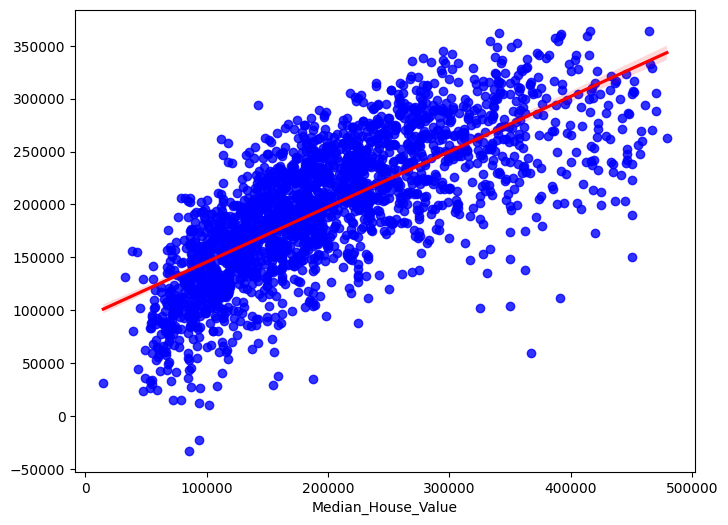

In [98]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_ridge, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

In [99]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test,y_pred_lr)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)

In [100]:
print('Mean Squared Error LR: ',mse_lr)
print('Mean Squared Error Lasso: ',mse_lasso)
print('Mean Squared Error Ridge: ',mse_ridge)
print('Mean absolute error LR: ', mae_lr)
print('Mean absolute error Lasso: ', mae_lasso)
print('Mean absolute error Ridge: ', mae_ridge)

Mean Squared Error LR:  3913803978.4021273
Mean Squared Error Lasso:  3913791250.9178443
Mean Squared Error Ridge:  3913817347.6407666
Mean absolute error LR:  46942.383558058646
Mean absolute error Lasso:  46943.34262435514
Mean absolute error Ridge:  46945.16537074284


In [101]:
r2_lr = r2_score(y_test,y_pred_lr)
r2_lasso = r2_score(y_test,y_pred_lasso)
r2_ridge = r2_score(y_test,y_pred_ridge)
print('R2 score LR: ',r2_lr)
print('R2 score Lasso: ',r2_lasso)
print('R2 score Ridge: ',r2_ridge)


R2 score LR:  0.5398081167066999
R2 score Lasso:  0.5398096132264526
R2 score Ridge:  0.5398065447283531


In [102]:
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
mspe_lr = np.mean(((y_test - y_pred_lr) / y_test) ** 2) * 100
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
mspe_lasso = np.mean(((y_test - y_pred_lasso) / y_test) ** 2) * 100
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
mspe_ridge = np.mean(((y_test - y_pred_ridge) / y_test) ** 2) * 100

In [103]:
print(f'MSPE_lr: {mspe_lr:.2f}%')
print(f'MAPE_lr: {mape_lr * 100:.2f}%')
print(f'MSPE_lasso: {mspe_lasso:.2f}%')
print(f'MAPE_lasso: {mape_lasso * 100:.2f}%')
print(f'MSPE_ridge: {mspe_ridge:.2f}%')
print(f'MAPE_ridge: {mape_ridge * 100:.2f}%')

MSPE_lr: 13.75%
MAPE_lr: 26.88%
MSPE_lasso: 13.75%
MAPE_lasso: 26.88%
MSPE_ridge: 13.75%
MAPE_ridge: 26.88%


when we excluded the most uncorrelated column with the mean house value the error increased